<a href="https://colab.research.google.com/github/tennille-bernard/Kal-Academy-Modules/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import packages**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Load training data & Preprocessing**

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values   #Refers to the Column named "Open"

In [ ]:
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler used to scale data from 0 to 1.  It can be customized to scale between different ranges.
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

**Sliding block technique**: We work in blocks of 60 where we take the first 60 rows of data as training data, and the 61st row as output. Then the rows 61 - 120 as input and row 121 as output, and so on until we reach the end.

In [ ]:
X_train = []   #creates an empty variable to append values into.
y_train = []   #row 61 = y train.
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)  #putting this data into an array, 1D

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
#reshaping for the LSTM model - it is expecting a 3D input, our array is currently in 1d.
#1st : X_train = Samples
#2nd D is 3 parts: X_train.shape[0], X_train.shape[1] = time steps; and 1.
#Part 1 = X_train.shape[0] --> number of samples = 60 rows (or however many rows I would set it to).
#Part 2 = X_train.shape[1] = # of time steps it has. so 60 to 61, 61 to 62, etc. that many.
#1 = # of features

**Building the LSTM model**

In [ ]:
#import tensorflow as tf
#import tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import Dropout, Dense, LSTM

units = 50 = # of neurons we expect it to have.  
return_sequences = 2, we want the model to use what it has learned. Connects previous neurons to next neurons.  
input_shape = the 2nd and third part of the second dimension above.  
Dropout = random, to avoid overfitting


In [ ]:
regressor = models.Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True)) #LSTM removes vanishing gradient problem
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50)) # Final output. Stacked 4 LSTM hidden layers.
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units = 1)) #Last output layer.

**Compile and retrain the model**  
this model is similar to a regression model, so we use  
1. optimizer = 'adam'
2. loss = 'mean_squared_error'

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - loss: 0.0945
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0061
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 0.0058
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - loss: 0.0048
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.0045
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - loss: 0.0042
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - loss: 0.0049
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.0046
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - loss: 0.0047
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.0052
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.0040
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - loss: 0.0045
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - loss: 0.0041
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.0053
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━

**Read and use test data, including data augmentation**

In [14]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

Want to have a smooth transition between training and test data, so we are taking the last 60 rows of the training data as input for the test data.

In [15]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values  #all the training data - length test data then minus the last 60 row = ~1198 rows
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)  #must follow the same scaling as for the training data

We only need 20 lines of code, so from range 60 - 80 (i.e. ~20)

In [16]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)   # Convert to 1D array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))   # Convert to a 3D array
predicted_stock_price = regressor.predict(X_test)  #predict the price, in the form of 0 to 1
predicted_stock_price = sc.inverse_transform(predicted_stock_price)   #inverse transform to get the actual price in dollars

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


**Visually compare prediction vs actual Google Stock Price**

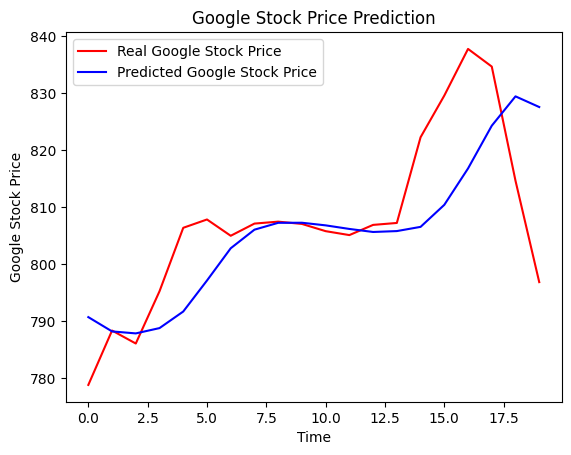

In [17]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()